In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import scipy

In [6]:
import matplotlib.pyplot as plt

In [7]:
import statsmodels.api as sm

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
import statsmodels.formula.api as smf

In [10]:
df = pd.read_csv('data.csv')
df2 = pd.DataFrame(df)

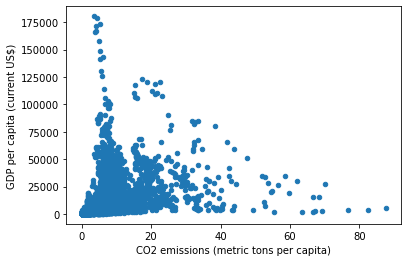

In [11]:
scatter = df.plot.scatter('CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)')

In [23]:
scatter.figure.savefig('intitial scatter.pdf', dpi=300)

In [24]:
df

,economy,time,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,PFC gas emissions,SF6 gas emissions,"Droughts, floods, extreme temperatures",Natural gas rents (% of GDP),GDP per capita (current US$),Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio
0,ABW,YR1970,NaN,NaN,NaN,NaN,19.667901,NaN,10.2469,1.826198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,YR1971,NaN,NaN,NaN,NaN,19.957364,NaN,10.4531,1.826948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,YR1972,NaN,NaN,NaN,NaN,20.005770,NaN,10.6570,1.844813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,YR1973,NaN,NaN,NaN,NaN,19.716685,NaN,10.8551,1.822090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,YR1974,NaN,NaN,NaN,NaN,18.926185,NaN,11.0415,1.821157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12933,ZWE,YR2015,81.427200,NaN,NaN,0.897598,2499.469604,NaN,11790.0000,6490.000000,NaN,NaN,NaN,0.0,1445.069702,NaN,NaN,NaN
12934,ZWE,YR2016,82.792603,NaN,NaN,0.783303,1587.372070,NaN,11380.0000,6090.000000,NaN,NaN,NaN,0.0,1464.588957,133.0,NaN,NaN
12935,ZWE,YR2017,83.492996,NaN,NaN,0.718570,NaN,NaN,11560.0000,6280.000000,NaN,NaN,NaN,0.0,1235.189032,NaN,25.4,NaN
12936,ZWE,YR2018,81.363602,NaN,NaN,0.849793,NaN,NaN,11850.0000,6470.000000,NaN,NaN,NaN,0.0,1254.642265,NaN,NaN,NaN


In [25]:
updated_df = df.dropna(subset=['CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)']) # not the best strategy, will figure out how to make a balanced data set?


In [26]:
updated_df

,economy,time,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,PFC gas emissions,SF6 gas emissions,"Droughts, floods, extreme temperatures",Natural gas rents (% of GDP),GDP per capita (current US$),Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio
16,ABW,YR1986,NaN,NaN,NaN,2.868274,1.278786e+02,NaN,13.84720,6.474660,NaN,NaN,NaN,0.0,6472.398709,NaN,NaN,NaN
17,ABW,YR1987,NaN,NaN,NaN,7.234613,1.439411e+02,NaN,14.30170,8.943996,NaN,NaN,NaN,0.0,7885.158927,NaN,NaN,NaN
18,ABW,YR1988,NaN,NaN,NaN,10.027328,NaN,NaN,14.54990,11.000443,NaN,NaN,NaN,0.0,9765.909207,NaN,NaN,NaN
19,ABW,YR1989,NaN,NaN,NaN,10.634558,NaN,NaN,14.89810,11.871481,NaN,NaN,NaN,0.0,11392.269150,NaN,NaN,NaN
49,AFE,YR1970,NaN,NaN,NaN,1.123261,1.587419e+06,NaN,384746.71821,316355.144832,NaN,NaN,NaN,NaN,236.793425,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12932,ZWE,YR2014,80.775002,NaN,NaN,0.894256,1.933484e+03,NaN,10820.00000,5840.000000,NaN,NaN,NaN,0.0,1434.896277,NaN,NaN,NaN
12933,ZWE,YR2015,81.427200,NaN,NaN,0.897598,2.499470e+03,NaN,11790.00000,6490.000000,NaN,NaN,NaN,0.0,1445.069702,NaN,NaN,NaN
12934,ZWE,YR2016,82.792603,NaN,NaN,0.783303,1.587372e+03,NaN,11380.00000,6090.000000,NaN,NaN,NaN,0.0,1464.588957,133.0,NaN,NaN
12935,ZWE,YR2017,83.492996,NaN,NaN,0.718570,NaN,NaN,11560.00000,6280.000000,NaN,NaN,NaN,0.0,1235.189032,NaN,25.4,NaN


In [28]:
# not the best strategy, will figure out how to make a balanced data set?
X = updated_df['CO2 emissions (metric tons per capita)']
Y = updated_df['GDP per capita (current US$)']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)
# plt.scatter(X, Y, color ="black")
# plt.plot(X, predictions, color ='green')

                                 OLS Regression Results                                 
Dep. Variable:     GDP per capita (current US$)   R-squared:                       0.226
Model:                                      OLS   Adj. R-squared:                  0.226
Method:                           Least Squares   F-statistic:                     3000.
Date:                          Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                                  10:45:25   Log-Likelihood:            -1.1086e+05
No. Observations:                         10256   AIC:                         2.217e+05
Df Residuals:                             10254   BIC:                         2.217e+05
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---

C:\Users\Anjali\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
main_df = df[df['time'] >= 'YR2000']
             
             
             #['YR2000','YR2001', 'YR2002', 'YR2003', 'YR2004', 'YR2005','YR2006', 'YR2007', 'YR2008', 'YR2009','YR2010', 'YR2011', 'YR2012', 'YR2013', 'YR2014', 'YR2015', 'YR2016','YR2017','YR2018']]

main_up_df = main_df.dropna(subset=['CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)'])

In [13]:
main_up_df

,economy,time,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,PFC gas emissions,SF6 gas emissions,"Droughts, floods, extreme temperatures",Natural gas rents (% of GDP),GDP per capita (current US$),Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio
79,AFE,YR2000,65.132445,46.947252,1.493292,0.900399,-20582.662963,NaN,377850.0,211260.0,NaN,NaN,NaN,0.020777,713.245921,NaN,NaN,NaN
80,AFE,YR2001,65.568145,47.435746,1.605760,0.971981,29919.739655,NaN,382600.0,210450.0,NaN,NaN,NaN,0.035570,633.608789,NaN,NaN,NaN
81,AFE,YR2002,64.578854,46.195218,1.643917,0.975749,27150.517473,NaN,405520.0,224400.0,NaN,NaN,NaN,0.034417,631.870340,NaN,NaN,NaN
82,AFE,YR2003,64.103145,47.271779,1.671814,1.009963,22082.333655,NaN,417940.0,229140.0,NaN,NaN,NaN,0.020311,819.743981,NaN,NaN,NaN
83,AFE,YR2004,63.216180,48.862058,1.706934,1.057182,28499.036494,NaN,426540.0,231320.0,NaN,NaN,NaN,0.038201,993.762711,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12932,ZWE,YR2014,80.775002,NaN,NaN,0.894256,1933.483643,NaN,10820.0,5840.0,NaN,NaN,NaN,0.000000,1434.896277,NaN,NaN,NaN
12933,ZWE,YR2015,81.427200,NaN,NaN,0.897598,2499.469604,NaN,11790.0,6490.0,NaN,NaN,NaN,0.000000,1445.069702,NaN,NaN,NaN
12934,ZWE,YR2016,82.792603,NaN,NaN,0.783303,1587.372070,NaN,11380.0,6090.0,NaN,NaN,NaN,0.000000,1464.588957,133.0,NaN,NaN
12935,ZWE,YR2017,83.492996,NaN,NaN,0.718570,NaN,NaN,11560.0,6280.0,NaN,NaN,NaN,0.000000,1235.189032,NaN,25.4,NaN


In [34]:
main_up_df.to_csv('updated.csv')

In [72]:
X = main_up_df['CO2 emissions (metric tons per capita)']
Y = main_up_df['GDP per capita (current US$)']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions2 = model.predict(X) 

print_model = model.summary()
print(print_model)




                                 OLS Regression Results                                 
Dep. Variable:     GDP per capita (current US$)   R-squared:                       0.362
Model:                                      OLS   Adj. R-squared:                  0.362
Method:                           Least Squares   F-statistic:                     2542.
Date:                          Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                                  14:46:24   Log-Likelihood:                -49201.
No. Observations:                          4474   AIC:                         9.841e+04
Df Residuals:                              4472   BIC:                         9.842e+04
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---

C:\Users\Anjali\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


79       3974.372980
80       4127.036808
81       4135.073652
82       4208.042140
83       4308.746432
            ...     
12932    3961.271822
12933    3968.399670
12934    3724.638401
12935    3586.582767
12936    3866.443862
Length: 4474, dtype: float64


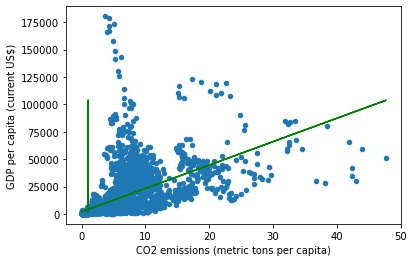

In [73]:
main_up_df.plot.scatter('CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)')
plt.plot(X, predictions2, color ='green')

print(predictions2)



In [91]:
main_up_df_2 = main_up_df[main_up_df['CO2 emissions (metric tons per capita)'] != 0]

In [87]:
main_up_df_2['log_gdp'] = np.log(main_up_df["GDP per capita (current US$)"])

C:\Users\Anjali\AppData\Local\Temp/ipykernel_14776/3500380147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['log_gdp'] = np.log(main_up_df["GDP per capita (current US$)"])


In [92]:
main_up_df_2['log_co2'] = np.log(main_up_df["CO2 emissions (metric tons per capita)"])

In [112]:
co2 = main_up_df_2["log_co2"]
gdp = main_up_df_2["log_gdp"]
co2= sm.add_constant(co2)
# had to drop some variables that had co2 = 0 because then log(co2) was becoming minus infinity 

model2 = sm.OLS(gdp, co2).fit()
predictions3 = model2.predict(co2) 

print_model_2 = model2.summary()
print(print_model_2)



print(co2)

                            OLS Regression Results                            
Dep. Variable:                log_gdp   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                 1.267e+04
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:47:11   Log-Likelihood:                -5096.0
No. Observations:                4463   AIC:                         1.020e+04
Df Residuals:                    4461   BIC:                         1.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7333      0.012    619.662      0.0

C:\Users\Anjali\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [113]:
main_up_df_2.describe() #summary statistics

,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,PFC gas emissions,SF6 gas emissions,"Droughts, floods, extreme temperatures",Natural gas rents (% of GDP),GDP per capita (current US$),Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio,log_gdp,log_co2
count,4319.000000,2861.000000,2917.000000,4463.000000,3.865000e+03,556.000000,4.463000e+03,4.452000e+03,556.000000,561.000000,163.000000,4343.000000,4463.000000,227.000000,1587.000000,360.000000,4463.000000,4463.000000
mean,32.753227,65.107246,2.237337,4.322685,-3.431318e+04,14526.220674,3.378101e+05,1.226695e+05,1768.693627,3451.774699,1.162100,0.677001,11274.007785,95.283361,8.317139,27.154056,8.317725,0.675857
std,29.031169,29.267234,3.170379,5.108949,1.238349e+05,67942.538947,9.733233e+05,3.394155e+05,7079.613855,15004.050815,1.957511,2.864745,18110.052773,70.326737,12.492063,11.515768,1.485653,1.477464
min,0.000000,0.000000,0.054961,0.016313,-1.054316e+06,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,111.927225,7.000000,0.000000,2.370000,4.717849,-4.115812
25%,7.511806,44.168319,1.607629,0.783515,-5.239246e+03,0.000000,3.460000e+03,1.167500e+03,0.000000,0.000000,0.022075,0.000000,1288.298951,37.450000,0.300000,18.400000,7.161078,-0.243965
50%,23.989631,75.043951,2.246695,2.596054,-1.498116e+02,87.500000,1.420000e+04,5.865000e+03,0.000000,0.000000,0.260471,0.026796,4043.662923,78.300000,2.300000,24.900000,8.304906,0.953993
75%,55.254950,87.804714,2.648436,6.230153,5.091310e+02,1058.675000,9.114000e+04,3.667000e+04,303.775000,428.700000,1.252664,0.442774,11820.691968,149.400000,11.000000,33.200000,9.377607,1.829401
max,98.342903,100.000000,103.157895,47.699934,1.400387e+05,834345.574846,8.174420e+06,2.986520e+06,78622.308605,174905.385537,9.226586,68.563750,180366.715198,324.100000,77.400000,74.200000,12.102747,3.864930


79       7.642519
80       7.708674
81       7.712020
82       7.741824
83       7.781338
           ...   
12932    7.636599
12933    7.639825
12934    7.522038
12935    7.447445
12936    7.592495
Length: 4463, dtype: float64


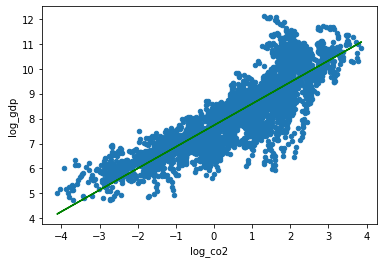

In [121]:
#scatter plot!

co2 = main_up_df_2["log_co2"].to_numpy().reshape(4463,1)
gdp = main_up_df_2["log_gdp"].to_numpy().reshape(4463,1)
model3 = LinearRegression()
model3.fit(co2, gdp)

main_up_df_2.plot.scatter('log_co2', 'log_gdp')
plt.plot(co2, model3.predict(co2), color ='green')
print(predictions3)




In [ ]:
main_up_df['Develop_Dummy'] = 0 if df['Salary'] < df['Salary'].median() else 1

In [16]:
main_up_df['economy'].to_csv('countries.csv')

# all countries in dataset: AFE, , AFW, ,,ARB , , , ,  , , CEB, , ,  CSS, EAP, EAR, EAS, ECA, ECS, EMU, , ,  , EUU, FCS, , HIC, HPC, , ,  IBD, IBT, IDA, IDB, IDX, , , , , LAC,  LCN, LDC, LIC, ,  LMC, LMY,  LTE, , , ,  MEA,  MOZ,  NAC,  , PAN,  , PRE, , PSS,  SSF, SST,  , , , TEA, TEC, ,  ,  UGA,  UMC, , ,  WLD, , , 


In [19]:
middle inc AGO, ALB, ARG, ARM, AZE, BEN, BGD, BGR, BIH, BLR, BLZ, BOL, BRA, BTN, BWA, CHN, CIV, CMR,  COG, COL, COM, CPV, CRI, CUB,DJI, DMA,DOM, DZA, ECU, EGY, FJI, FSM, GAB, GEO, GHA, GNQ, , GRD, GTM, GUY, HND,  IDN,IND,  IRN, IRQ, JAM, JOR, KAZ, KEN, KGZ, KHM, KIR,  LAO, LBN, LBY, LCA, LKA, LSO, MAR, MDA,MDV, MEX, MHL, MRT, MYS, NAM, PER, PHL,PNG,PRY, PSE, RUS, STP, SUR, SWZ, THA,TUN, TUR, TUV, TZA, UKR, UZB, VCT, VEN, VNM, VUT, WSM,ZAF, ZMB, ZWE 

SyntaxError: invalid syntax (2873430706.py, line 1)

In [18]:
main_up_df['High_income'] = 1 if main_up_df['economy' = 'AND', 'ATG', 'AUS', 'AUT', 'BHS', 'BHR', 'ARE', 'BEL', 'BRB', 'BRN', 'CAN', 'CHE', 'CHL', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HRV', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KNA', 'KOR', 'KWT', 'LIE', 'LTU', 'LUX', 'LVA', 'MLT', 'MUS', 'NLD', 'NRU','NZL', 'OMN', 'PAN', 'PLW', 'POL', 'PRT', 'QAT', 'ROU', 'SAU', 'SGP', 'SVK', 'SVN', 'SWE', 'SYC', 'TTO', 'URY', 'USA'] else 0

SyntaxError: invalid syntax (2082929318.py, line 1)

In [ ]:
main_up_df['Low_income'] = 1 if main_up_df['economy' = 'AFG', 'BDI', 'BFA', 'CAF', 'COD', 'ERI', 'ETH', 'GIN', 'GMB', 'GNB', 'HTI', 'LBR', 'MDG', 'MLI', 'MOZ', 'MWI', 'NER', 'RWA', 'SDN', 'SLE', 'SOM', 'SSD', 'SYR', 'TCD', 'TGO', 'TJK', 'UGA', 'YEM'] else 0